In [43]:
import pandas as pd
import seaborn as sns
from sklearn import tree
import itertools
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import math
from collections import Counter
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

In [44]:
#data_csv = pd.read_csv('', low_memory=False, header=None, nrows=20000)
data_csv = pd.read_csv('/home/rajeev/Documents/Project/Logs_A.csv', low_memory=False)

In [45]:
# assign columns to data set
data_csv.columns = ['Time','Destination','Rule','Interface_Direction','Policy_Rule_UID','Type','Interface','Policy_Date',
                    'Service_ID','Action','ID','Interface_Name','Layer_Name','Source_Port','Product_Family','Blade',
                    'Sequence_Number','Source_Zone','Source','Access_Rule_Name','Policy_Name','id_generated_by_indexer',
                    'Destination_Zone','Database_Tag','Log_Server_Origin','Service','Origin','Marker','Destination_Port',
                    'Domain','Protocol','logid','first','Policy_Management','Xlate_(NAT)_Source_IP','NAT_Additional_Rule_Number',
                    'nat_rule_uid','Xlate_(NAT)_Source_Port','NAT_Rule_Number','Xlate_(NAT)_Destination_Port','dst_domain_name',
                    'dst_uo_name','dst_uo_icon','tcp_flags','tcp_packet_out_of_state','Resource','icmp_type','icmp','icmp_code',
                    'Direction_of_Connection','log_delay','action_reason','src_uo_icon','src_uo_name','lastupdatetime',
                    'Message_Information','sys_message','Performance_Impact','sub_policy_uid','Protection_ID','Confidence_Level',
                    'Attack_Information','Industry_Reference','Attack_Name','Severity','Threat_Profile','Protection_Type','Suppressed_Logs',
                    'Sub_Policy_Name','Protection_Name','Total_Logs','dce-rpc_interface_uuid-2','dce-rpc_interface_uuid-1',
                    'dce-rpc_interface_uuid-3','dce-rpc_interface_uuid','Xlate_(NAT)_Destination_IP','rpc_prog','Reason','precise_error',
                    'Proxied_Source_IP','source_object','Description','fw_message','source','Received_Bytes','packet_capture_time','Method',
                    'Threat_Prevention_Policy_Date','Incident_ID','Vendor_List','HTTP_Host','Sent_Bytes','Scope','Threat_Prevention_Rule_ID',
                    'Threat_Prevention_Policy','Log_ID','Packet_Capture_Name','Session_ID','Malware_Action','Packet_Capture','Scheme',
                    'validation_log','Vpn_Feature_Name','dn','instruction','Email_Session_ID','Information','Email_Control','update_service',
                    'version','comment','Status','Peer_Gateway','encryption_failure','reject_category','encryption_fail_reason','Tags',
                    'description_url','reject_id_kid','Execution','ser_agent_kid','User_Agent','Malware_Family','Credential_Access',
                    'Collection','Discovery','Initial_Access','inspection_settings_log','streaming_engine','src_domain_name','Methods',
                    'Session_ID','community','User','ike','cookiei','cookier','srckeyid','msgid','dstkeyid','ike_ids','failure_impact',
                    'more_sources','User_Domain','Device_ID','Duration','Event_Type','Mobile_Access_Category','Login_TimeStamp',
                    'Source_OS','control_log_type','failed_login_factor_num','Host_Name','Domain_Name','os_build','Tunnel_Protocol',
                    'User_Group','Login_Option','session_timeout','Office_Mode_IP','Device','Machine_Name','MAC_Address','Client_Version',
                    'Client_Name','Host_IP','Client_Build','OS_Version','OS_Bits','OS_Name','os_edition','Auth_Encryption_Methods','connection_uid',
                    'start_time']


In [4]:

print(data_csv.shape)
data_csv.head()

(251554, 174)


Time     Destination   Rule Interface_Direction  \
0  July 18, 2023 1:18:41 PM  20.202.255.225  5.294             inbound   
1  July 18, 2023 1:18:41 PM    192.168.5.37  5.680             inbound   
2  July 18, 2023 1:18:41 PM  192.168.224.36  5.680             inbound   
3  July 18, 2023 1:18:41 PM    52.166.80.90  5.294             inbound   
4  July 18, 2023 1:18:41 PM   12.10.193.196  5.151             inbound   

                        Policy_Rule_UID Type Interface           Policy_Date  \
0  b74e79b2-cc95-4006-9115-258b6b2cd986  RST      eth1  2023-04-28T16:57:15Z   
1  ac716e7a-4ad8-466f-9134-20007f12fe30  RST      eth1  2023-04-28T16:57:15Z   
2  ac716e7a-4ad8-466f-9134-20007f12fe30  RST      eth1  2023-04-28T16:57:15Z   
3  b74e79b2-cc95-4006-9115-258b6b2cd986  FIN      eth1  2023-04-28T16:57:15Z   
4  78799b30-d542-4d4e-a391-baa891bf1091  RST      eth1  2023-04-28T16:29:24Z   

       Service_ID Action  ... Client_Name Host_IP Client_Build  OS_Version  \
0            http   Drop  ...         NaN     NaN          NaN         NaN   
1            snmp   Drop  ...         NaN     NaN          NaN         NaN   
2            snmp   Drop  ...         NaN     NaN          NaN         NaN   
3           https   Drop  ...         NaN     NaN          NaN         NaN   
4  tcp-high-ports   Drop  ...         NaN     NaN          NaN         NaN   

  OS_Bits OS_Name  os_edition Auth_Encryption_Methods connection_uid  \
0     NaN     NaN         NaN                     NaN            NaN   
1     NaN     NaN         NaN                     NaN            NaN   
2     NaN     NaN         NaN                     NaN            NaN   
3     NaN     NaN         NaN                     NaN            NaN   
4     NaN     NaN         NaN                     NaN            NaN   

  start_time  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  

[5 rows x 174 columns]

In [5]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251554 entries, 0 to 251553
Columns: 174 entries, Time to start_time
dtypes: bool(2), float64(77), int64(1), object(94)
memory usage: 330.6+ MB


In [6]:
data_csv.Action.value_counts()

Action
Drop      193649
Accept     57905
Name: count, dtype: int64

In [7]:
data_csv.isnull().sum()

Time                            0
Destination                     0
Rule                        10027
Interface_Direction             0
Policy_Rule_UID             10027
                            ...  
OS_Name                    251554
os_edition                 251554
Auth_Encryption_Methods    251554
connection_uid             251554
start_time                 251554
Length: 174, dtype: int64

In [8]:
count = data_csv.Action.value_counts()
count

Action
Drop      193649
Accept     57905
Name: count, dtype: int64

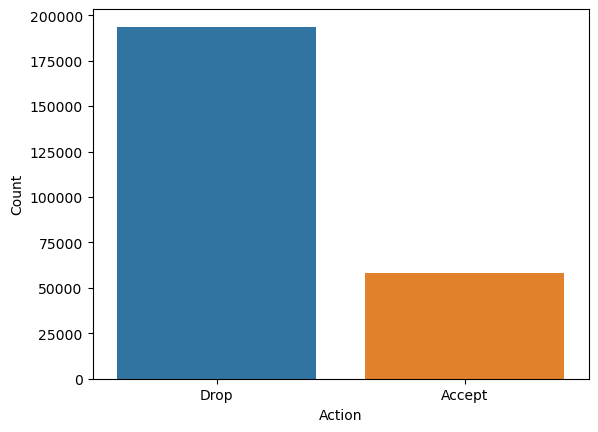

In [9]:
sns.barplot(x=count.index, y=count)
plt.xlabel('Action')
plt.ylabel('Count');

In [10]:
#Feature Engineering

In [11]:
data_csv.tail()

Time      Destination   Rule Interface_Direction  \
251549  July 18, 2023 1:15:30 PM    192.168.244.5  5.480             inbound   
251550  July 18, 2023 1:15:30 PM    20.150.37.230  5.294             inbound   
251551  July 18, 2023 1:15:30 PM    (192.168.96.6  5.900             inbound   
251552  July 18, 2023 1:15:30 PM   52.182.143.210  5.128             inbound   
251553  July 18, 2023 1:15:30 PM  192.168.175.135  5.440             inbound   

                             Policy_Rule_UID        Type  Interface  \
251549  a6416ccd-b460-4599-b87a-c8af18a05dc2  Connection  bond0.320   
251550  b74e79b2-cc95-4006-9115-258b6b2cd986      Reject       eth1   
251551  2c2970b9-92c5-4506-b0d5-8dcd11c9a304  Connection  bond0.200   
251552  5506278c-3493-4d04-b153-546a06332e04  Connection       eth1   
251553  f65155bc-bc93-4e34-8faf-792b02e5f0a3  Connection       eth1   

                 Policy_Date  Service_ID  Action  ... Client_Name Host_IP  \
251549  2023-04-28T16:29:24Z  domain-udp  Accept  ...         NaN     NaN   
251550  2023-04-28T16:57:15Z       https    Drop  ...         NaN     NaN   
251551  2023-04-28T16:29:24Z        snmp  Accept  ...         NaN     NaN   
251552  2023-04-28T16:57:15Z       https  Accept  ...         NaN     NaN   
251553  2023-04-28T16:57:15Z    TCP_5985  Accept  ...         NaN     NaN   

       Client_Build  OS_Version OS_Bits OS_Name  os_edition  \
251549          NaN         NaN     NaN     NaN         NaN   
251550          NaN         NaN     NaN     NaN         NaN   
251551          NaN         NaN     NaN     NaN         NaN   
251552          NaN         NaN     NaN     NaN         NaN   
251553          NaN         NaN     NaN     NaN         NaN   

       Auth_Encryption_Methods connection_uid start_time  
251549                     NaN            NaN        NaN  
251550                     NaN            NaN        NaN  
251551                     NaN            NaN        NaN  
251552                     NaN            NaN        NaN  
251553                     NaN            NaN        NaN  

[5 rows x 174 columns]

In [12]:
data_csv.head()

Time     Destination   Rule Interface_Direction  \
0  July 18, 2023 1:18:41 PM  20.202.255.225  5.294             inbound   
1  July 18, 2023 1:18:41 PM    192.168.5.37  5.680             inbound   
2  July 18, 2023 1:18:41 PM  192.168.224.36  5.680             inbound   
3  July 18, 2023 1:18:41 PM    52.166.80.90  5.294             inbound   
4  July 18, 2023 1:18:41 PM   12.10.193.196  5.151             inbound   

                        Policy_Rule_UID Type Interface           Policy_Date  \
0  b74e79b2-cc95-4006-9115-258b6b2cd986  RST      eth1  2023-04-28T16:57:15Z   
1  ac716e7a-4ad8-466f-9134-20007f12fe30  RST      eth1  2023-04-28T16:57:15Z   
2  ac716e7a-4ad8-466f-9134-20007f12fe30  RST      eth1  2023-04-28T16:57:15Z   
3  b74e79b2-cc95-4006-9115-258b6b2cd986  FIN      eth1  2023-04-28T16:57:15Z   
4  78799b30-d542-4d4e-a391-baa891bf1091  RST      eth1  2023-04-28T16:29:24Z   

       Service_ID Action  ... Client_Name Host_IP Client_Build  OS_Version  \
0            http   Drop  ...         NaN     NaN          NaN         NaN   
1            snmp   Drop  ...         NaN     NaN          NaN         NaN   
2            snmp   Drop  ...         NaN     NaN          NaN         NaN   
3           https   Drop  ...         NaN     NaN          NaN         NaN   
4  tcp-high-ports   Drop  ...         NaN     NaN          NaN         NaN   

  OS_Bits OS_Name  os_edition Auth_Encryption_Methods connection_uid  \
0     NaN     NaN         NaN                     NaN            NaN   
1     NaN     NaN         NaN                     NaN            NaN   
2     NaN     NaN         NaN                     NaN            NaN   
3     NaN     NaN         NaN                     NaN            NaN   
4     NaN     NaN         NaN                     NaN            NaN   

  start_time  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  

[5 rows x 174 columns]

In [13]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251554 entries, 0 to 251553
Columns: 174 entries, Time to start_time
dtypes: bool(2), float64(77), int64(1), object(94)
memory usage: 330.6+ MB


In [14]:
data_csv["Action"].value_counts()

Action
Drop      193649
Accept     57905
Name: count, dtype: int64

In [46]:
lb_make = LabelEncoder()
data_csv["type_code"] = lb_make.fit_transform(data_csv["Action"])
data_csv["type_code"].value_counts()

type_code
1    193649
0     57905
Name: count, dtype: int64

In [16]:
data_csv.shape

(251554, 175)

In [17]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251554 entries, 0 to 251553
Columns: 175 entries, Time to type_code
dtypes: bool(2), float64(77), int64(2), object(94)
memory usage: 332.5+ MB


In [18]:
data_csv['Action'].value_counts()



Action
Drop      193649
Accept     57905
Name: count, dtype: int64

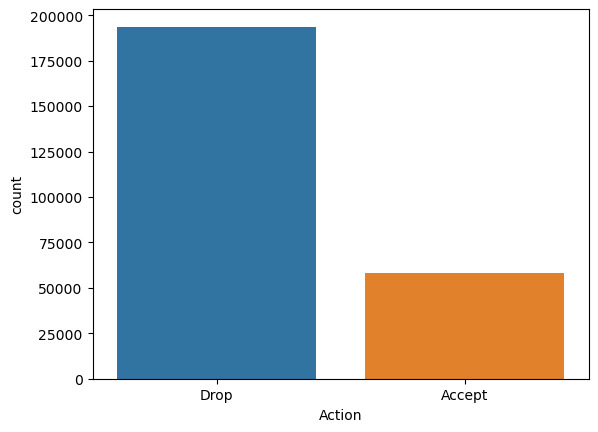

In [19]:
sns.countplot(x='Action', data=data_csv);

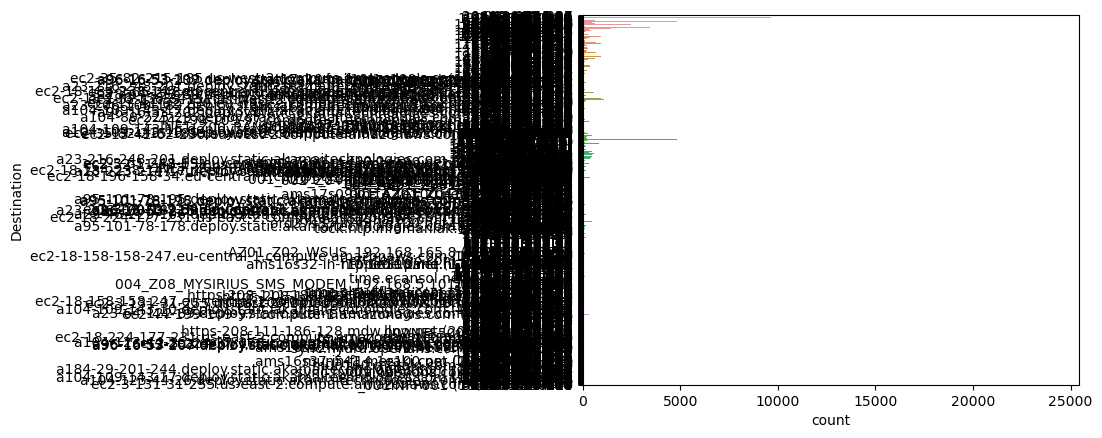

In [20]:
sns.countplot(y='Destination', data=data_csv);

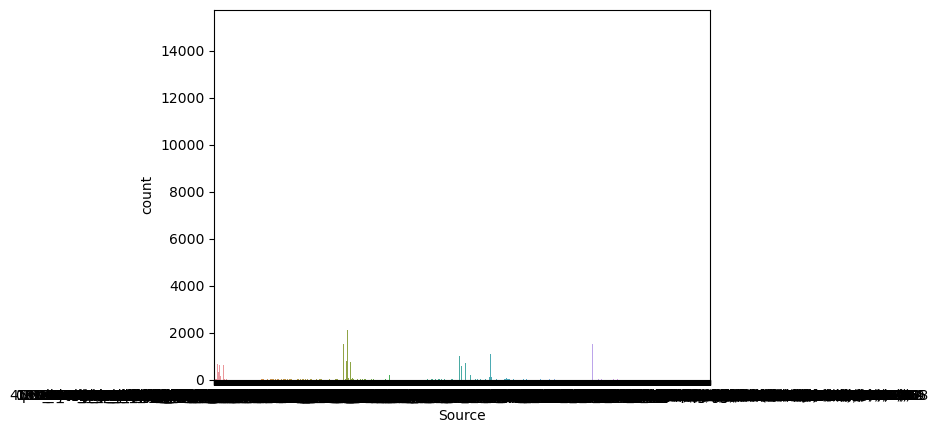

In [21]:
sns.countplot(x='Source', data=data_csv);

In [23]:
s_count = data_csv.Service_ID.value_counts()
s_count

Service_ID
https              141162
tcp-high-ports      26034
domain-udp          19796
http                19475
TCP_5985             7441
                    ...  
TCP_VMWARE_9087         1
TCP_FTPS_11021          1
TCP_8003                1
rip                     1
FW1_omi-sic             1
Name: count, Length: 185, dtype: int64

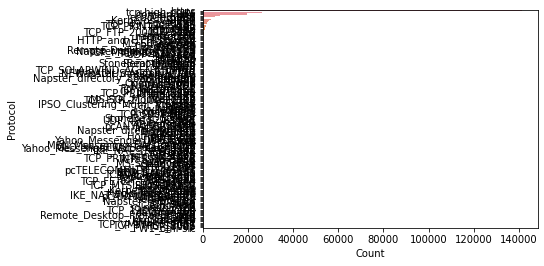

In [127]:
sns.barplot(y=s_count.index, x=s_count)
plt.xlabel('Count')
plt.ylabel('Protocol');


In [24]:
tcp_flag_count = data_csv.tcp_flags.value_counts()
tcp_flag_count

tcp_flags
SYN-ACK         271
FIN-ACK         168
FIN-PUSH-ACK    103
PUSH-ACK         90
ACK              60
RST-ACK          41
RST              18
No Flags          2
Name: count, dtype: int64

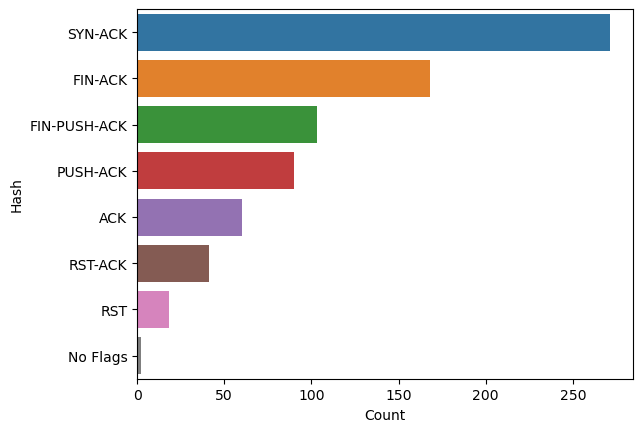

In [25]:
sns.barplot(y=tcp_flag_count.index, x=tcp_flag_count)
plt.xlabel('Count')
plt.ylabel('Hash');

In [26]:
connection_type = data_csv.Type.value_counts()
connection_type

Type
Reject        186383
Connection     61558
FIN             2965
INT              267
Log              162
RST              122
CON               97
Name: count, dtype: int64

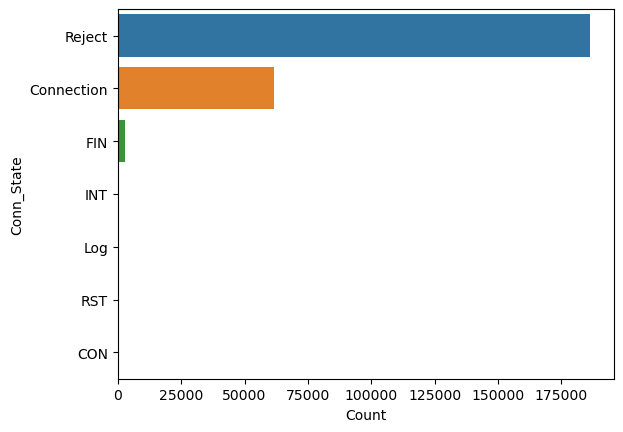

In [27]:
sns.barplot(y=connection_type.index, x=connection_type)
plt.xlabel('Count')
plt.ylabel('Conn_State');

<AxesSubplot:>

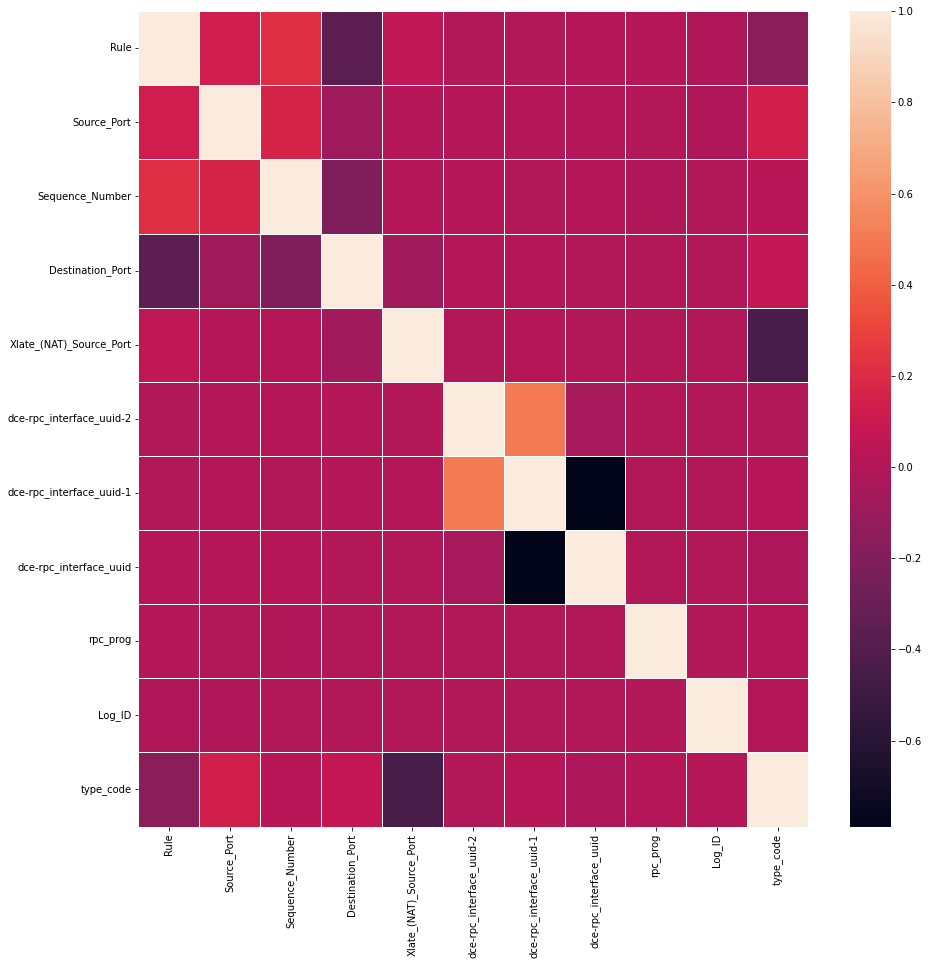

In [135]:
plt.figure(figsize=(15, 15))
sns.heatmap(data_csv.corr(), linewidths=.5)

In [26]:
data_csv.describe()

Rule    Source_Port  Sequence_Number  Destination_Port  \
count  251554.000000  251554.000000    251554.000000     251554.000000   
mean        5.037408   53221.371328        14.847031       3530.227764   
std         1.121459   11861.906475        11.960839      10162.501374   
min         0.000000       0.000000         1.000000          0.000000   
25%         5.270000   50579.000000         4.000000        443.000000   
50%         5.294000   55491.000000        12.000000        443.000000   
75%         5.294000   59518.000000        23.000000        443.000000   
max         5.980000   65535.000000       107.000000      65535.000000   

       Xlate_(NAT)_Source_Port      icmp_type      icmp_code  \
count            251554.000000  251554.000000  251554.000000   
mean               2743.133168       0.171331       0.000052   
std               10077.419889       1.158119       0.025920   
min                   0.000000       0.000000       0.000000   
25%                   0.000000       0.000000       0.000000   
50%                   0.000000       0.000000       0.000000   
75%                   0.000000       0.000000       0.000000   
max               59997.000000       8.000000      13.000000   

       dce-rpc_interface_uuid-2  dce-rpc_interface_uuid-1  \
count              2.515540e+05              2.515540e+05   
mean               4.180053e+04             -1.630251e+05   
std                1.976238e+07              1.680391e+07   
min               -1.812774e+09             -1.988219e+09   
25%                0.000000e+00              0.000000e+00   
50%                0.000000e+00              0.000000e+00   
75%                0.000000e+00              0.000000e+00   
max                1.258689e+09              3.054202e+08   

       dce-rpc_interface_uuid-3  dce-rpc_interface_uuid       rpc_prog  \
count              2.515540e+05            2.515540e+05  251554.000000   
mean              -2.806329e+05            3.410454e+05       5.167876   
std                2.018840e+07            2.300898e+07     718.862292   
min               -1.667433e+09            0.000000e+00       0.000000   
25%                0.000000e+00            0.000000e+00       0.000000   
50%                0.000000e+00            0.000000e+00       0.000000   
75%                0.000000e+00            0.000000e+00       0.000000   
max                0.000000e+00            2.001296e+09  100000.000000   

              Log_ID      type_code  
count  251554.000000  251554.000000  
mean        1.609468       1.539165  
std       807.175186       0.841997  
min         0.000000       0.000000  
25%         0.000000       2.000000  
50%         0.000000       2.000000  
75%         0.000000       2.000000  
max    404840.000000       3.000000

In [244]:
data_csv.columns

Index(['Time', 'Destination', 'Rule', 'Interface_Direction', 'Policy_Rule_UID',
       'Type', 'Interface', 'Policy_Date', 'Service_ID', 'Action',
       ...
       'Host_IP', 'Client_Build', 'OS_Version', 'OS_Bits', 'OS_Name',
       'os_edition', 'Auth_Encryption_Methods', 'connection_uid', 'start_time',
       'type_code'],
      dtype='object', length=175)

In [136]:
data_csv.groupby('Action').max()

/tmp/ipykernel_6819/2615753808.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  data_csv.groupby('Action').max()


Rule  Source_Port  Sequence_Number  Destination_Port  \
Action                                                         
Accept  5.98      65535.0              107           50111.0   
Drop    5.96      65534.0              105           65535.0   

        Xlate_(NAT)_Source_Port  dce-rpc_interface_uuid-2  \
Action                                                      
Accept                  59997.0              1.258689e+09   
Drop                    59921.0              1.258689e+09   

        dce-rpc_interface_uuid-1  dce-rpc_interface_uuid  rpc_prog    Log_ID  \
Action                                                                         
Accept               305420152.0            2.001296e+09       0.0       0.0   
Drop                 305420152.0            1.338171e+09  100000.0  404840.0   

        type_code  
Action             
Accept          0  
Drop            1

In [145]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251554 entries, 0 to 251553
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Rule                      251554 non-null  float64
 1   Action                    0 non-null       float64
 2   Source_Port               251554 non-null  float64
 3   Sequence_Number           251554 non-null  int64  
 4   Destination_Port          251554 non-null  float64
 5   Xlate_(NAT)_Source_Port   251554 non-null  float64
 6   icmp_type                 251553 non-null  float64
 7   icmp_code                 251553 non-null  float64
 8   dce-rpc_interface_uuid-2  251554 non-null  float64
 9   dce-rpc_interface_uuid-1  251554 non-null  float64
 10  dce-rpc_interface_uuid-3  251553 non-null  float64
 11  dce-rpc_interface_uuid    251554 non-null  float64
 12  rpc_prog                  251554 non-null  float64
 13  Log_ID                    251554 non-null  f

In [47]:
data_csv['Action'] = data_csv['Action'].apply(pd.to_numeric,  errors='coerce')
data_csv['icmp_type'] = data_csv['icmp_type'].apply(pd.to_numeric,  errors='coerce')
data_csv['icmp_code'] = data_csv['icmp_code'].apply(pd.to_numeric,  errors='coerce')
data_csv['dce-rpc_interface_uuid-3'] = data_csv['dce-rpc_interface_uuid-3'].apply(pd.to_numeric,  errors='coerce')

In [181]:
# looking at the correlations of the features.
corr = data_csv.corr()
corr.style.background_gradient(cmap='coolwarm')

<AxesSubplot:xlabel='Action', ylabel='Count'>

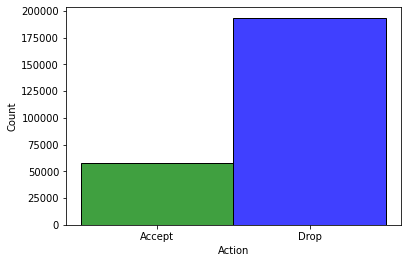

In [78]:
#Accept represents as 0
#Detect represents as 1
#Drop represents as 2

sns.histplot(data_csv.loc[data_csv['type_code'] == 0]['Action'], bins = 20, color='green')
sns.histplot(data_csv.loc[data_csv['type_code'] == 1]['Action'], bins = 20, color='blue')
sns.histplot(data_csv.loc[data_csv['type_code'] == 2]['Action'], bins = 20, color='red')
sns.histplot(data_csv.loc[data_csv['type_code'] == 3]['Action'], bins = 20, color='orange')


<AxesSubplot:>

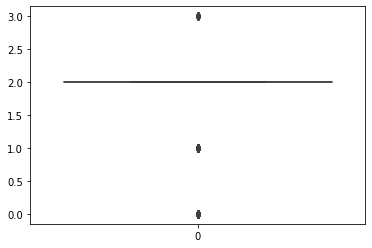

In [335]:
sns.boxplot(data_csv['type_code'])

In [134]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251554 entries, 0 to 251553
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Rule                      251554 non-null  float64
 1   Action                    251554 non-null  object 
 2   Source_Port               251554 non-null  float64
 3   Sequence_Number           251554 non-null  int64  
 4   Destination_Port          251554 non-null  float64
 5   Xlate_(NAT)_Source_Port   251554 non-null  float64
 6   icmp_type                 251554 non-null  object 
 7   icmp_code                 251554 non-null  object 
 8   dce-rpc_interface_uuid-2  251554 non-null  float64
 9   dce-rpc_interface_uuid-1  251554 non-null  float64
 10  dce-rpc_interface_uuid-3  251554 non-null  object 
 11  dce-rpc_interface_uuid    251554 non-null  float64
 12  rpc_prog                  251554 non-null  float64
 13  Log_ID                    251554 non-null  f

In [48]:
del data_csv ['Action']

In [49]:
# data preprocessing - in this, deleting un-necessary tables and null holding table
del data_csv ['Time']
del data_csv ['Destination']
del data_csv ['Interface_Direction']
del data_csv ['Type']
del data_csv ['Interface']
del data_csv ['Policy_Date']
del data_csv ['Service_ID']
del data_csv ['Layer_Name']
del data_csv ['Attack_Information']
del data_csv ['Attack_Name']
del data_csv ['Severity']
del data_csv ['Protection_Type']
del data_csv ['Protection_Name']
del data_csv ['source_object']
del data_csv ['Destination_Zone']
del data_csv ['Xlate_(NAT)_Source_IP']
del data_csv ['tcp_flags']
del data_csv ['icmp']
del data_csv ['src_uo_name']
del data_csv ['Message_Information']
del data_csv ['Protection_ID']
del data_csv ['Product_Family']
del data_csv ['Blade']
del data_csv ['Source_Zone']
del data_csv ['Source']
del data_csv ['Policy_Name']
del data_csv ['Service']
del data_csv ['Origin']
del data_csv ['Policy_Rule_UID']
del data_csv ['ID']
del data_csv ['Host_IP']
del data_csv ['MAC_Address']
del data_csv ['Client_Version']
del data_csv ['Client_Build']
del data_csv ['Office_Mode_IP']
del data_csv ['Device']
del data_csv ['Machine_Name']
del data_csv ['OS_Bits']
del data_csv ['OS_Name']
del data_csv ['os_edition']
del data_csv ['Auth_Encryption_Methods']
del data_csv ['connection_uid']
del data_csv ['start_time']
del data_csv ['Source_OS']
del data_csv ['control_log_type']
del data_csv ['failed_login_factor_num']
del data_csv ['Host_Name']
del data_csv ['Domain_Name']
del data_csv ['os_build']
del data_csv ['Tunnel_Protocol']
del data_csv ['User_Group']
del data_csv ['Login_Option']
del data_csv ['OS_Version']
del data_csv ['dstkeyid']
del data_csv ['ike_ids']
del data_csv ['failure_impact']
del data_csv ['more_sources']
del data_csv ['User_Domain']
del data_csv ['Device_ID']
del data_csv ['Duration']
del data_csv ['Event_Type']
del data_csv ['Mobile_Access_Category']
del data_csv ['msgid']
del data_csv ['Execution']
del data_csv ['ser_agent_kid']
del data_csv ['User_Agent']
del data_csv ['Malware_Family']
del data_csv ['Credential_Access']
del data_csv ['Collection']
del data_csv ['Discovery']
del data_csv ['Initial_Access']
del data_csv ['inspection_settings_log']
del data_csv ['streaming_engine']
del data_csv ['version']
del data_csv ['comment']
del data_csv ['Status']
del data_csv ['Peer_Gateway']
del data_csv ['encryption_failure']
del data_csv ['reject_category']
del data_csv ['encryption_fail_reason']
del data_csv ['Tags']
del data_csv ['description_url']
del data_csv ['reject_id_kid']
del data_csv ['Packet_Capture']
del data_csv ['Scheme']
del data_csv ['validation_log']
del data_csv ['Vpn_Feature_Name']
del data_csv ['dn']
del data_csv ['instruction']
del data_csv ['Email_Session_ID']
del data_csv ['Information']
del data_csv ['Email_Control']
del data_csv ['update_service']
del data_csv ['Vendor_List']
del data_csv ['Session_ID']
del data_csv ['Description']
del data_csv ['fw_message']
del data_csv ['source']
del data_csv ['Received_Bytes']
del data_csv ['packet_capture_time']
del data_csv ['Threat_Profile']
del data_csv ['Suppressed_Logs']
del data_csv ['Sub_Policy_Name']
del data_csv ['Direction_of_Connection']
del data_csv ['log_delay']
del data_csv ['action_reason']
del data_csv ['src_uo_icon']
del data_csv ['lastupdatetime']
del data_csv ['sys_message']
del data_csv ['Performance_Impact']
del data_csv ['sub_policy_uid']
del data_csv ['dst_domain_name']
del data_csv ['dst_uo_name']
del data_csv ['dst_uo_icon']
del data_csv ['tcp_packet_out_of_state']
del data_csv ['Resource']
del data_csv ['Domain']
del data_csv ['Protocol']
del data_csv ['logid']
del data_csv ['first']
del data_csv ['Policy_Management']
del data_csv ['NAT_Additional_Rule_Number']
del data_csv ['nat_rule_uid']
del data_csv ['NAT_Rule_Number']
del data_csv ['Access_Rule_Name']
del data_csv ['id_generated_by_indexer']
del data_csv ['Database_Tag']
del data_csv ['Log_Server_Origin']
del data_csv ['Marker']
del data_csv ['Xlate_(NAT)_Destination_IP']
del data_csv ['User']
del data_csv ['ike']
del data_csv ['cookiei']
del data_csv ['cookier']
del data_csv ['srckeyid']
del data_csv ['Login_TimeStamp']
del data_csv ['session_timeout']
del data_csv ['Threat_Prevention_Rule_ID']
del data_csv ['Interface_Name']
del data_csv ['Xlate_(NAT)_Destination_Port']
del data_csv ['Confidence_Level']
del data_csv ['Industry_Reference']
del data_csv ['Total_Logs']
del data_csv ['Reason']
del data_csv ['Proxied_Source_IP']
del data_csv ['precise_error']
del data_csv ['Method']
del data_csv ['Threat_Prevention_Policy_Date']
del data_csv ['Incident_ID']
del data_csv ['community']
del data_csv ['Client_Name']
del data_csv ['src_domain_name']
del data_csv ['Malware_Action']
del data_csv ['Packet_Capture_Name']
del data_csv ['Threat_Prevention_Policy']
del data_csv ['Methods']
del data_csv ['Scope']
del data_csv ['HTTP_Host']
del data_csv ['Sent_Bytes']

In [50]:
data_csv.fillna(0,inplace=True)

In [51]:
#Predictor Variables
x = data_csv[['Rule','Source_Port', 'Sequence_Number', 'Destination_Port', 'Xlate_(NAT)_Source_Port',
       'icmp_type', 'icmp_code', 'dce-rpc_interface_uuid-2', 'dce-rpc_interface_uuid-1', 'dce-rpc_interface_uuid-3',
       'dce-rpc_interface_uuid', 'rpc_prog', 'Log_ID']]

#Target Variable
y = data_csv['type_code']

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3,shuffle=True, random_state=700)

In [53]:
x_train

Rule  Source_Port  Sequence_Number  Destination_Port  \
101919  5.294      65168.0               43             443.0   
45440   5.294      55991.0               10             443.0   
180789  5.550      64638.0               16             443.0   
133778  5.294      52828.0                5              80.0   
184435  5.294      59832.0               27             443.0   
...       ...          ...              ...               ...   
119164  5.294      50534.0               10             443.0   
83057   3.000      51138.0                1            2222.0   
105886  5.480      61169.0                5              53.0   
193672  5.294      51988.0               18             443.0   
159363  5.151      51631.0                2             514.0   

        Xlate_(NAT)_Source_Port  icmp_type  icmp_code  \
101919                      0.0        0.0        0.0   
45440                       0.0        0.0        0.0   
180789                  44850.0        0.0        0.0   
133778                      0.0        0.0        0.0   
184435                      0.0        0.0        0.0   
...                         ...        ...        ...   
119164                      0.0        0.0        0.0   
83057                       0.0        0.0        0.0   
105886                      0.0        0.0        0.0   
193672                      0.0        0.0        0.0   
159363                      0.0        0.0        0.0   

        dce-rpc_interface_uuid-2  dce-rpc_interface_uuid-1  \
101919                       0.0                       0.0   
45440                        0.0                       0.0   
180789                       0.0                       0.0   
133778                       0.0                       0.0   
184435                       0.0                       0.0   
...                          ...                       ...   
119164                       0.0                       0.0   
83057                        0.0                       0.0   
105886                       0.0                       0.0   
193672                       0.0                       0.0   
159363                       0.0                       0.0   

        dce-rpc_interface_uuid-3  dce-rpc_interface_uuid  rpc_prog  Log_ID  
101919                       0.0                     0.0       0.0     0.0  
45440                        0.0                     0.0       0.0     0.0  
180789                       0.0                     0.0       0.0     0.0  
133778                       0.0                     0.0       0.0     0.0  
184435                       0.0                     0.0       0.0     0.0  
...                          ...                     ...       ...     ...  
119164                       0.0                     0.0       0.0     0.0  
83057                        0.0                     0.0       0.0     0.0  
105886                       0.0                     0.0       0.0     0.0  
193672                       0.0                     0.0       0.0     0.0  
159363                       0.0                     0.0       0.0     0.0  

[176087 rows x 13 columns]

In [54]:
x_test

Rule  Source_Port  Sequence_Number  Destination_Port  \
110126  0.000      48967.0                1            1365.0   
214389  5.294      59630.0               29             443.0   
99706   5.140      51265.0                4           36162.0   
66878   5.294      52715.0               19             443.0   
140692  5.200      50371.0                5              53.0   
...       ...          ...              ...               ...   
64784   5.151      61311.0                1              80.0   
217528  5.294      56490.0               14             443.0   
60545   5.294      60130.0               28              80.0   
1441    5.294      43987.0               11             443.0   
77606   5.130      49140.0                2           33000.0   

        Xlate_(NAT)_Source_Port  icmp_type  icmp_code  \
110126                      0.0        0.0        0.0   
214389                      0.0        0.0        0.0   
99706                       0.0        0.0        0.0   
66878                       0.0        0.0        0.0   
140692                  35604.0        0.0        0.0   
...                         ...        ...        ...   
64784                       0.0        0.0        0.0   
217528                      0.0        0.0        0.0   
60545                       0.0        0.0        0.0   
1441                        0.0        0.0        0.0   
77606                       0.0        0.0        0.0   

        dce-rpc_interface_uuid-2  dce-rpc_interface_uuid-1  \
110126                       0.0                       0.0   
214389                       0.0                       0.0   
99706                        0.0                       0.0   
66878                        0.0                       0.0   
140692                       0.0                       0.0   
...                          ...                       ...   
64784                        0.0                       0.0   
217528                       0.0                       0.0   
60545                        0.0                       0.0   
1441                         0.0                       0.0   
77606                        0.0                       0.0   

        dce-rpc_interface_uuid-3  dce-rpc_interface_uuid  rpc_prog  Log_ID  
110126                       0.0                     0.0       0.0     0.0  
214389                       0.0                     0.0       0.0     0.0  
99706                        0.0                     0.0       0.0     0.0  
66878                        0.0                     0.0       0.0     0.0  
140692                       0.0                     0.0       0.0     0.0  
...                          ...                     ...       ...     ...  
64784                        0.0                     0.0       0.0     0.0  
217528                       0.0                     0.0       0.0     0.0  
60545                        0.0                     0.0       0.0     0.0  
1441                         0.0                     0.0       0.0     0.0  
77606                        0.0                     0.0       0.0     0.0  

[75467 rows x 13 columns]

In [55]:
y_train

101919    1
45440     1
180789    0
133778    1
184435    1
         ..
119164    1
83057     1
105886    0
193672    1
159363    1
Name: type_code, Length: 176087, dtype: int64

In [56]:
y_test

110126    1
214389    1
99706     1
66878     1
140692    0
         ..
64784     1
217528    1
60545     1
1441      1
77606     1
Name: type_code, Length: 75467, dtype: int64

In [ ]:
#Statistical comparison of models using grid search
#We will start by simulating moon shaped data (where the ideal separation between classes is non-linear), adding to it a moderate degree of noise. Datapoints will belong to one of two possible classes to be predicted by two features. We will simulate 50 samples for each class:

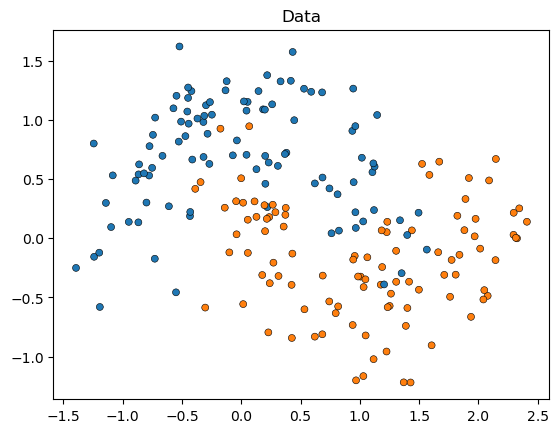

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_moons

x, y = make_moons(noise=0.3, random_state=200, n_samples=200)

sns.scatterplot(
    x=x[:, 0], y=x[:, 1], hue=y, marker="o", s=25, edgecolor="k", legend=False
).set_title("Data")
plt.show()

In [ ]:
#We will compare the performance of SVC estimators that vary on their kernel parameter, to decide which choice of this hyper-parameter predicts our simulated data best. We will evaluate the performance of the models using RepeatedStratifiedKFold, repeating 10 times a 10-fold stratified cross validation using a different randomization of the data in each repetition. The performance will be evaluated using roc_auc_score.

In [39]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.svm import SVC

param_grid = [
    {"kernel": ["linear"]},
    {"kernel": ["poly"], "degree": [2, 3]},
    {"kernel": ["rbf"]},
]

svc = SVC(random_state=0)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=0)

search = GridSearchCV(estimator=svc, param_grid=param_grid, scoring="roc_auc", cv=cv)
search.fit(x, y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=10, random_state=0),
             estimator=SVC(random_state=0),
             param_grid=[{'kernel': ['linear']},
                         {'degree': [2, 3], 'kernel': ['poly']},
                         {'kernel': ['rbf']}],
             scoring='roc_auc')

In [40]:
import pandas as pd

results_df = pd.DataFrame(search.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])
results_df = results_df.set_index(
    results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("kernel")
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

params  rank_test_score  mean_test_score  \
kernel                                                                      
rbf                   {'kernel': 'rbf'}                1           0.9400   
linear             {'kernel': 'linear'}                2           0.9300   
3_poly  {'degree': 3, 'kernel': 'poly'}                3           0.9044   
2_poly  {'degree': 2, 'kernel': 'poly'}                4           0.6852   

        std_test_score  
kernel                  
rbf           0.079297  
linear        0.077846  
3_poly        0.098776  
2_poly        0.169106

In [ ]:
#We can see that the estimator using the 'rbf' kernel performed best, closely followed by 'linear'. Both estimators with a 'poly' kernel performed worse, with the one using a two-degree polynomial achieving a much lower performance than all other models.

Usually, the analysis just ends here, but half the story is missing. The output of GridSearchCV does not provide information on the certainty of the differences between the models. We don’t know if these are statistically significant. To evaluate this, we need to conduct a statistical test. Specifically, to contrast the performance of two models we should statistically compare their AUC scores. There are 100 samples (AUC scores) for each model as we repreated 10 times a 10-fold cross-validation.

However, the scores of the models are not independent: all models are evaluated on the same 100 partitions, increasing the correlation between the performance of the models. Since some partitions of the data can make the distinction of the classes particularly easy or hard to find for all models, the models scores will co-vary.

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

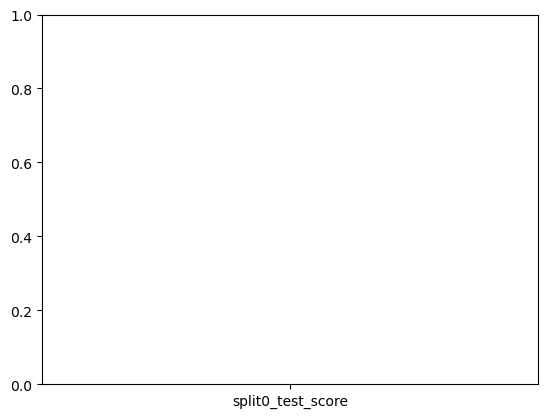

In [42]:
# create df of model scores ordered by performance
model_scores = results_df.filter(regex=r"split\d*_test_score")

# plot 30 examples of dependency between cv fold and AUC scores
fig, ax = plt.subplots()
sns.lineplot(
    data=model_scores.transpose().iloc[:30],
    dashes=False,
    palette="Set1",
    marker="o",
    alpha=0.5,
    ax=ax,
)
ax.set_xlabel("CV test fold", size=12, labelpad=10)
ax.set_ylabel("Model AUC", size=12)
ax.tick_params(bottom=True, labelbottom=False)
plt.show()

# print correlation of AUC scores across folds
print(f"Correlation of models:\n {model_scores.transpose().corr()}")

In [37]:
#Receiver Operating Characteristic (ROC) with cross validation
#ROC curves typically feature true positive rate (TPR) on the Y axis, and false positive rate (FPR) on the X axis. 
#This means that the top left corner of the plot is the “ideal” point - a FPR of zero, and a TPR of one. 
#This is not very realistic, but it does mean that a larger Area Under the Curve (AUC) is usually better. 
#The “steepness” of ROC curves is also important, since it is ideal to maximize the TPR while minimizing the FPR.

In [51]:
import numpy as np

from sklearn.datasets import load_iris

iris = load_iris()
target_names = iris.target_names
x, y = iris.data, iris.target
x, y = x[y != 2], y[y != 2]
n_samples, n_features = x.shape

In [52]:
random_state = np.random.RandomState(60)
x = np.concatenate([x, random_state.randn(n_samples, 100 * n_features)], axis=1)

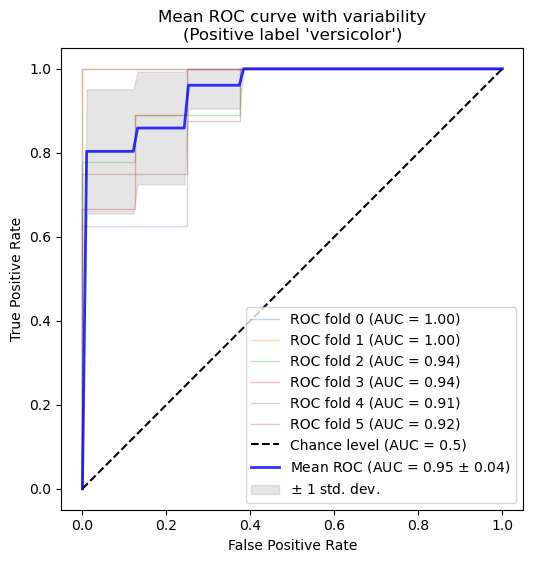

In [53]:
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import RocCurveDisplay, auc
from sklearn.model_selection import StratifiedKFold

n_splits = 6
cv = StratifiedKFold(n_splits=n_splits)
classifier = svm.SVC(kernel="linear", probability=True, random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(x, y)):
    classifier.fit(x[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        x[test],
        y[test],
        name=f"ROC fold {fold}",
        alpha=0.3,
        lw=1,
        ax=ax,
        plot_chance_level=(fold == n_splits - 1),
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mean ROC curve with variability\n(Positive label '{target_names[1]}')",
)
ax.axis("square")
ax.legend(loc="lower right")
plt.show()

In [159]:
# 1st Model: XGBoost Classifier

model = xgb.XGBClassifier(n_estimators= 100)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))


score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.2f" % score)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     11581
           1       1.00      0.98      0.99     38730

    accuracy                           0.99     50311
   macro avg       0.98      0.99      0.98     50311
weighted avg       0.99      0.99      0.99     50311

accuracy:   0.99


In [160]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


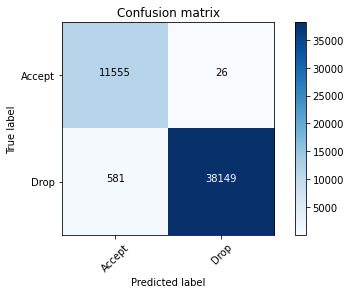

In [162]:
cm=confusion_matrix(y_test,y_pred,labels=[0,1])

plot_confusion_matrix(cm,classes=['Accept','Drop'])

In [163]:
xgb_feature = model.feature_importances_
xgb_features = xgb_feature.tolist()

In [164]:
# 2nd Model: GradientBoostingClassifier

from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbdt.fit(x_train,y_train)
y_pred = gbdt.predict(x_test)
print(classification_report(y_test,y_pred))

score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.2f" % score)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11581
           1       0.99      0.98      0.98     38730

    accuracy                           0.97     50311
   macro avg       0.96      0.97      0.96     50311
weighted avg       0.97      0.97      0.97     50311

accuracy:   0.97


Confusion matrix, without normalization


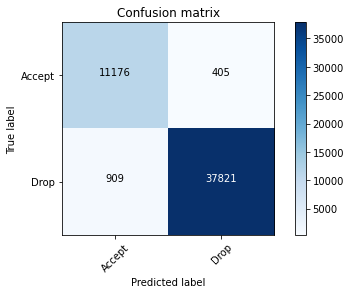

In [165]:
cm=confusion_matrix(y_test,y_pred,labels=[0,1])

plot_confusion_matrix(cm,classes=['Accept','Drop'])

In [166]:
gbdt_feature = gbdt.feature_importances_
gbdt_features = gbdt_feature.tolist()



In [167]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=1)
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)

print(classification_report(y_test,y_pred))

score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.2f" % score)


              precision    recall  f1-score   support

           0       0.51      0.89      0.65     11581
           1       0.96      0.74      0.84     38730

    accuracy                           0.78     50311
   macro avg       0.73      0.82      0.74     50311
weighted avg       0.85      0.78      0.79     50311

accuracy:   0.78


Confusion matrix, without normalization


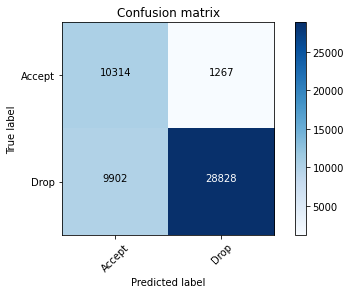

In [168]:
cm=confusion_matrix(y_test,y_pred,labels=[0,1])

plot_confusion_matrix(cm,classes=['Accept','Drop'])

In [170]:
# 3rd Model: LightGBM Classifier
lgb = LGBMClassifier(boosting_type= 'gbdt',n_jobs = 5, 
          silent = True, random_state=5)

LGB_C = lgb.fit(x_train, y_train)

y_pred = LGB_C.predict(x_test)
print(classification_report(y_test,y_pred))

score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.2f" % score)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 154919, number of negative: 46324
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005576 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 959
[LightGBM] [Info] Number of data points in the train set: 201243, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.769811 -> initscore=1.207242
[LightGBM] [Info] Start training from score 1.207242
[LightGBM] [Warning] Unknown parameter: silent
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11581
           1       1.00      0.98      0.99     38730

    accuracy                           0.98     50311
   macro avg       0.97      0.99      0.98     50311
weighted avg       0.99    

In [171]:
lgb_feature = lgb.feature_importances_
lgb_feature

array([828, 768, 286, 547, 503,  64,   0,   3,   1,   0,   0,   0,   0],
      dtype=int32)

In [172]:
lgb_features = lgb_feature.tolist()



In [173]:
#Plotting ensemble Feature Importance
cols = x_train.columns
# Create a dataframe with features
feature_dataframe = pd.DataFrame( {'features': cols,
    
    'Gradient Boost feature importances': gbdt_features,
    'XG Boost feature importances': xgb_features, 
    'LGBM feature importances': lgb_features
                                   
    })
feature_dataframe['mean'] = feature_dataframe.mean(axis= 1) # axis = 1 computes the mean row-wise
feature_dataframe.head(3)

/tmp/ipykernel_6819/236750188.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  feature_dataframe['mean'] = feature_dataframe.mean(axis= 1) # axis = 1 computes the mean row-wise


features  Gradient Boost feature importances  \
0             Rule                            0.444761   
1      Source_Port                            0.031708   
2  Sequence_Number                            0.027818   

   XG Boost feature importances  LGBM feature importances        mean  
0                      0.372733                       828  276.272498  
1                      0.011862                       768  256.014523  
2                      0.013426                       286   95.347081

/tmp/ipykernel_6819/3575775259.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


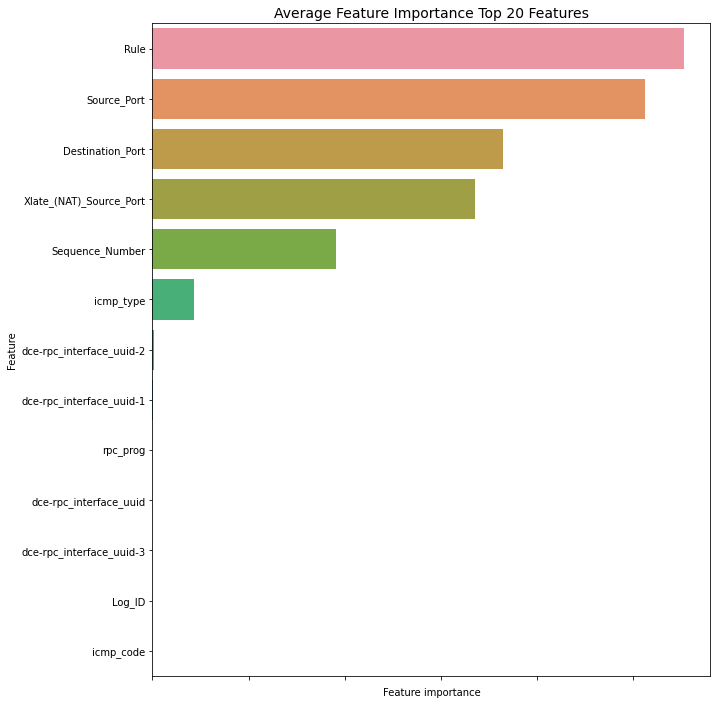

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
def plot_feature_importance():
    tmp = pd.DataFrame({'Feature': x_test.columns, 'Feature importance': feature_dataframe['mean'].values})
    tmp = tmp.sort_values(by='Feature importance',ascending=False).head(20)
    plt.figure(figsize = (10,12))
    plt.title('Average Feature Importance Top 20 Features',fontsize=14)
    s = sns.barplot(y='Feature',x='Feature importance',data=tmp, orient='h')
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()
plot_feature_importance()

#############################################
######-ml_model => <class 'sklearn.tree._classes.DecisionTreeClassifier'> 
Test Accuracy :  98.40%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     11581
           1       0.99      0.99      0.99     38730

    accuracy                           0.98     50311
   macro avg       0.98      0.98      0.98     50311
weighted avg       0.98      0.98      0.98     50311

             Confusion_matrix 


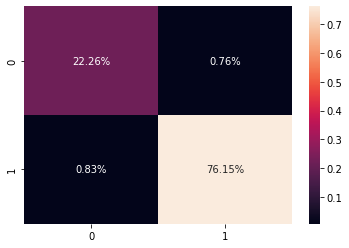

###################- End -###################
#############################################
######-ml_model => <class 'sklearn.ensemble._forest.RandomForestClassifier'> 
Test Accuracy :  98.45%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     11581
           1       1.00      0.98      0.99     38730

    accuracy                           0.98     50311
   macro avg       0.97      0.99      0.98     50311
weighted avg       0.98      0.98      0.98     50311

             Confusion_matrix 


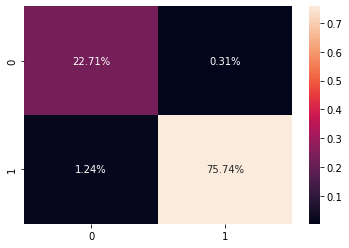

###################- End -###################
#############################################
######-ml_model => <class 'sklearn.neighbors._classification.KNeighborsClassifier'> 
Test Accuracy :  95.91%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     11581
           1       0.97      0.97      0.97     38730

    accuracy                           0.96     50311
   macro avg       0.94      0.94      0.94     50311
weighted avg       0.96      0.96      0.96     50311

             Confusion_matrix 


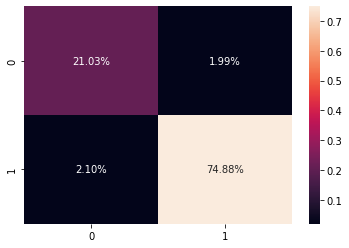

###################- End -###################
#############################################
######-ml_model => <class 'lightgbm.sklearn.LGBMClassifier'> 
[LightGBM] [Info] Number of positive: 154919, number of negative: 46324
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002887 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 958
[LightGBM] [Info] Number of data points in the train set: 201243, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.769811 -> initscore=1.207242
[LightGBM] [Info] Start training from score 1.207242
Test Accuracy :  98.45%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11581
           1       1.00      0.98      0.99     38730

    accuracy                           0.98     50311
   ma

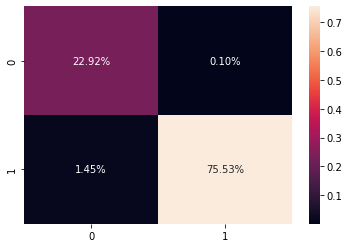

###################- End -###################
#############################################
######-ml_model => <class 'sklearn.ensemble._gb.GradientBoostingClassifier'> 
Test Accuracy :  97.94%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     11581
           1       1.00      0.98      0.99     38730

    accuracy                           0.98     50311
   macro avg       0.96      0.98      0.97     50311
weighted avg       0.98      0.98      0.98     50311

             Confusion_matrix 


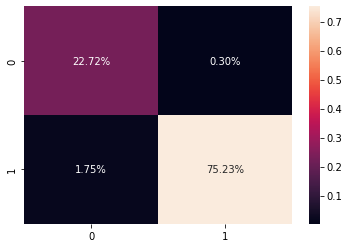

###################- End -###################
#############################################
######-ml_model => <class 'xgboost.sklearn.XGBClassifier'> 
Test Accuracy :  98.79%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     11581
           1       1.00      0.98      0.99     38730

    accuracy                           0.99     50311
   macro avg       0.98      0.99      0.98     50311
weighted avg       0.99      0.99      0.99     50311

             Confusion_matrix 


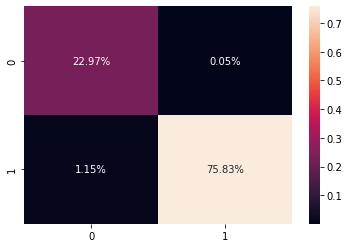

###################- End -###################
#############################################
######-ml_model => <class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'> 
Test Accuracy :  85.09%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.91      0.39      0.55     11581
           1       0.84      0.99      0.91     38730

    accuracy                           0.85     50311
   macro avg       0.88      0.69      0.73     50311
weighted avg       0.86      0.85      0.83     50311

             Confusion_matrix 


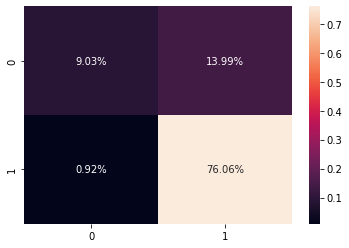

###################- End -###################


In [175]:
ml_models = [DecisionTreeClassifier,RandomForestClassifier,KNeighborsClassifier,LGBMClassifier,GradientBoostingClassifier,XGBClassifier,MLPClassifier]
accuracy_test=[]

for m in ml_models:
    print('#############################################')
    print('######-ml_model =>\033[07m {} \033[0m'.format(m))
    ml_model_ = m()
    ml_model_.fit(x_train, y_train)
    pred = ml_model_.predict(x_test)
    acc = accuracy_score(pred, y_test)
    accuracy_test.append(acc)
    print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(acc*100))
    print('\033[01m              Classification_report \033[0m')
    print(classification_report(y_test, pred))
    print('\033[01m             Confusion_matrix \033[0m')
    cf_matrix = confusion_matrix(y_test, pred)
    plot_ = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt= '0.2%')
    plt.show()
    print('\033[31m###################- End -###################\033[0m')


In [176]:
output = pd.DataFrame({"Model":['Decision Tree Classifier','Random Forest Classifier',
                                'KNeighbors Classifier','LGBMClassifier','GradientBoostingClassifier','XGBClassifier','MLPClassifier'],
                      "Accuracy":accuracy_test})

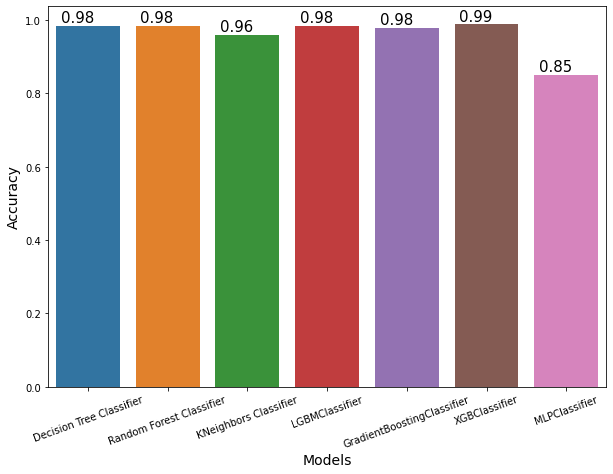

In [182]:
plt.figure(figsize=(10, 7))
plots = sns.barplot(x='Model', y='Accuracy', data=output)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 3,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Models", size=14)
plt.xticks(rotation=20);
plt.ylabel("Accuracy", size=14)
plt.show()

In [ ]:
#=================ROC&AUC==================

In [202]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
target_names = iris.target_names
x, y = iris.data, iris.target
y = iris.target_names[y]

random_state = np.random.RandomState(0)
n_samples, n_features = x.shape
n_classes = len(np.unique(y))
X = np.concatenate([x, random_state.randn(n_samples, 200 * n_features)], axis=1)
(
    x_train,
    x_test,
    y_train,
    y_test,
) = train_test_split(x, y, test_size=0.5, stratify=y, random_state=500)

In [203]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(75, 3)

In [204]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
y_score = classifier.fit(x_train, y_train).predict_proba(x_test)

/home/rajeev/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [205]:
label_binarizer.transform(["virginica"])

array([[0, 0, 1]])

In [206]:
class_of_interest = "virginica"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

2

In [207]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

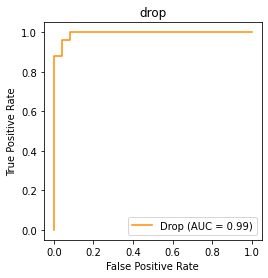

In [208]:
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"Drop",
    color="darkorange",
    #plot_chance_level=True,
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("drop")
plt.legend()
plt.show()

In [ ]:
#=========RF & GB - ROC&AUC

In [214]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

x, y = make_classification(n_samples=20_00, random_state=100)

x_full_train, x_test, y_full_train, y_test = train_test_split(
   x, y, test_size=0.2, random_state=10
)
x_train_ensemble, x_train_linear, y_train_ensemble, y_train_linear = train_test_split(
    x_full_train, y_full_train, test_size=0.2, random_state=100
)

In [216]:
n_estimators = 10
max_depth = 3

In [217]:
# random forest and GB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

random_forest = RandomForestClassifier(
    n_estimators=n_estimators, max_depth=max_depth, random_state=10
)
random_forest.fit(x_train_ensemble, y_train_ensemble)

gradient_boosting = GradientBoostingClassifier(
    n_estimators=n_estimators, max_depth=max_depth, random_state=10
)
_ = gradient_boosting.fit(x_train_ensemble, y_train_ensemble)

In [218]:
from sklearn.ensemble import RandomTreesEmbedding

random_tree_embedding = RandomTreesEmbedding(
    n_estimators=n_estimators, max_depth=max_depth, random_state=0
)

In [219]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

rt_model = make_pipeline(random_tree_embedding, LogisticRegression(max_iter=1000))
rt_model.fit(x_train_linear, y_train_linear)

Pipeline(steps=[('randomtreesembedding',
                 RandomTreesEmbedding(max_depth=3, n_estimators=10,
                                      random_state=0)),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [220]:
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder


def rf_apply(x, model):
    return model.apply(x)


rf_leaves_yielder = FunctionTransformer(rf_apply, kw_args={"model": random_forest})

rf_model = make_pipeline(
    rf_leaves_yielder,
    OneHotEncoder(handle_unknown="ignore"),
    LogisticRegression(max_iter=1000),
)
rf_model.fit(x_train_linear, y_train_linear)

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function rf_apply at 0x7fadb956ae60>,
                                     kw_args={'model': RandomForestClassifier(max_depth=3,
                                                                              n_estimators=10,
                                                                              random_state=10)})),
                ('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [227]:
def gbdt_apply(x, model):
    return model.apply(x)[:, :, 0]


gbdt_leaves_yielder = FunctionTransformer(
    gbdt_apply, kw_args={"model": gradient_boosting}
)

gbdt_model = make_pipeline(
    gbdt_leaves_yielder,
    OneHotEncoder(handle_unknown="ignore"),
    LogisticRegression(max_iter=1000),
)
gbdt_model.fit(x_train_linear, y_train_linear)

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function gbdt_apply at 0x7fadb4ab76d0>,
                                     kw_args={'model': GradientBoostingClassifier(n_estimators=10,
                                                                                  random_state=10)})),
                ('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('logisticregression', LogisticRegression(max_iter=1000))])

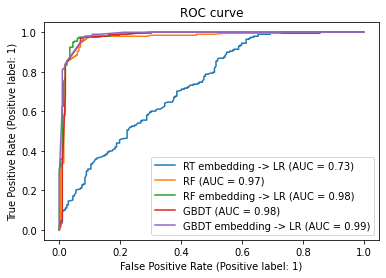

In [228]:
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots()

models = [
    ("RT embedding -> LR", rt_model),
    ("RF", random_forest),
    ("RF embedding -> LR", rf_model),
    ("GBDT", gradient_boosting),
    ("GBDT embedding -> LR", gbdt_model),
]

model_displays = {}
for name, pipeline in models:
    model_displays[name] = RocCurveDisplay.from_estimator(
        pipeline, x_test, y_test, ax=ax, name=name
    )
_ = ax.set_title("ROC curve")

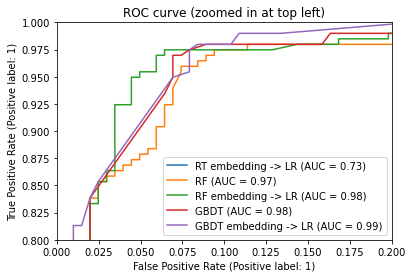

In [229]:
fig, ax = plt.subplots()
for name, pipeline in models:
    model_displays[name].plot(ax=ax)

ax.set_xlim(0, 0.2)
ax.set_ylim(0.8, 1)
_ = ax.set_title("ROC curve (zoomed in at top left)")

In [298]:
#MLP hyper parameter fine tunining
# Method for evaluating results
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [299]:
len(x.columns)

13

In [300]:
def predict( x_train, y_train, **kwargs):
    mlp = MLPClassifier(**kwargs, random_state=1)
    mlp.fit(x_train, y_train)
    return mlp.predict(x_test)

In [301]:
def calculateScoresNoOutput(y_test, predictions):
    accuracy = 100*accuracy_score(y_test, predictions)
    precision = 100*precision_score(y_test, predictions,average='weighted')
    recall = 100*recall_score(y_test, predictions,average='weighted')
    f1 = 100*f1_score(y_test, predictions,average='weighted')
    return {'Accuracy':accuracy, 'F1': f1}

In [302]:
from sklearn import preprocessing

In [303]:
# Let's try the different solvers
solvers = ['lbfgs']
results = []
for solver in solvers:
    result_dict = calculateScoresNoOutput(y_test, predict(x_train, y_train, solver=solver))
    result_dict['Solver'] = solver
    results.append(result_dict)
df = pd.DataFrame(results, columns = ['Solver','Accuracy', 'F1'])
df

/home/rajeev/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/rajeev/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Solver  Accuracy        F1
0  lbfgs  0.129196  0.154099

In [ ]:
#lbfgs has better convergence on relatively small datasets.

#(But what is algorithm convergence?

#(In simple words. If the error of solving is ranging within very small range (i.e., it is almost not changing), then that means the algorithm reached the solution (not necessary to be the best solution as it might be stuck at what so-called "local Optima").

#On the other hand, if the error is varying noticeably (even if the error is relatively small [like in your case the score was good], but rather the differences between the errors per iteration is greater than some tolerance) then we say the algorithm did not converge.

#Now, you need to know that Scikit-Learn API sometimes provides the user the option to specify the maximum number of iterations the algorithm should take while it's searching for the solution in an iterative manner:)

In [304]:
solvers = ['sgd']
results = []
for solver in solvers:
    result_dict = calculateScoresNoOutput(y_test, predict(x_train, y_train, solver=solver))
    result_dict['Solver'] = solver
    results.append(result_dict)
df = pd.DataFrame(results, columns = ['Solver','Accuracy', 'F1'])
df

/home/rajeev/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Solver   Accuracy         F1
0    sgd  78.704458  71.211647

In [305]:
solvers = ['adam']
results = []
for solver in solvers:
    result_dict = calculateScoresNoOutput(y_test, predict(x_train, y_train, solver=solver))
    result_dict['Solver'] = solver
    results.append(result_dict)
df = pd.DataFrame(results, columns = ['Solver','Accuracy', 'F1'])
df

/home/rajeev/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Solver   Accuracy         F1
0   adam  86.454255  84.913012

In [291]:
#Looks like the adam solver is the best, with highest accuray and F1 scores. We'll use that from now on.

In [306]:
# Generalise attempting different values
def try_different_values(values, column_name, x_train, y_train, **kwargs):
    results = []
    for value in values:
        kwargs[column_name] = value
        result_dict = calculateScoresNoOutput(y_test, predict(x_train, y_train, **kwargs))
        result_dict[column_name] = value
        results.append(result_dict)
    df = pd.DataFrame(results, columns = [column_name,'Accuracy', 'F1'])
    return df

In [307]:
activations = ['identity', 'logistic', 'tanh', 'relu']
try_different_values(activations, 'activation', x_train, y_train, solver='adam')

/home/rajeev/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rajeev/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rajeev/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rajeev/.local/lib/python3.10/site-packages/sklearn/metrics/_classifica

activation   Accuracy         F1
0   identity  83.842500  80.796658
1   logistic  85.541929  83.347523
2       tanh  86.066665  84.249238
3       relu  86.454255  84.913012

In [ ]:
#Another improvement using the logistic activation. Let's try adjusting the regularisation

In [309]:
alphas = []
for i in range(5,10):
     alphas.append(1/(2**i))
alpha_df = try_different_values(alphas, 'alpha', x_train, y_train, solver='adam', activation='logistic')

/home/rajeev/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rajeev/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rajeev/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rajeev/.local/lib/python3.10/site-packages/sklearn/metrics/_classifica

<AxesSubplot:xlabel='alpha'>

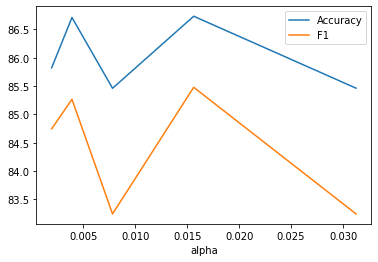

In [310]:
alpha_df.set_index('alpha', inplace=True)
alpha_df.plot()

In [311]:
print(alpha_df.loc[alpha_df['Accuracy'].idxmax()])
print(alpha_df.loc[alpha_df['F1'].idxmax()])

Accuracy    86.732524
F1          85.477749
Name: 0.015625, dtype: float64
Accuracy    86.732524
F1          85.477749
Name: 0.015625, dtype: float64


In [312]:
# The regularisation parameter doesn't seem to change much. Let's save it and try the batch size
# Store alpha
alpha=0.0001


In [ ]:
batch_sizes = [2 ** e for e in range(10)]
batch_df = try_different_values(batch_sizes, 'batch_size', x_train, y_train, solver='adam', activation='logistic', alpha=alpha)

/home/rajeev/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/home/rajeev/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rajeev/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/home/rajeev/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(res